### Ordinary differential equations (ODE; Numerical Recipes and P. Cordero notes)

#### 1) Verlet method

The Verlet method is especially suitable for solving Newton's equation when the force only depends on the position:

$$
\frac{d^2\vec{r}}{dt^2} = \frac{\vec{F}(t, \vec{r})}{m}. \tag{1}
$$

Although it can be generalized to the case where there is a linear viscous force ($-c\vec{v}$), we will concentrate on the case where the force has no dependence on $\vec{v}$.

Equation (1) is discretized directly:

We know that

$$
\vec{r}_{n+1}-\vec{r}_{n}=h\vec{v}_{n}+\frac{h^2}{2}\vec{a}_{n}+\frac{h^3}{3!}\vec{a}_{n}'+\frac{h^4}{4!}\vec{a}_{n}''+O(h^5), \tag{2}
$$

and

$$
\vec{r}_{n-1}-\vec{r}_{n}=-h\vec{v}_{n}+\frac{h^2}{2}\vec{a}_{n}-\frac{h^3}{3!}\vec{a}_{n}'+\frac{h^4}{4!}\vec{a}_{n}''+O(h^5). \tag{3}
$$

Then

$$
\vec{r}_{n+1}-2\vec{r}_{n} + \vec{r}_{n-1} = h^2\vec{a}_{n} + O(h^4), \tag{4}
$$

which means that

$$
\frac{\vec{r}_{n+1}-2\vec{r}_{n} + \vec{r}_{n-1}}{h^2} = \vec{a}_{n} + O(h^2). \tag{5}
$$

Therefore, the Verlet method is:

$$
\vec{r}_{n+1}= 2\vec{r}_{n} - \vec{r}_{n-1} + h^2\vec{a}_{n} + O(h^4). \tag{6}
$$

#### Considerations:

a) It requires first two steps as initial conditions; we can use RK to obtain the 2nd step.

b) Even though the truncation error is small, its round-off error can be significant since $h^2$ is used in each step. This problem can be reduced by using leapfrog.

---

### 2) Leapfrog (or Verlet/Leapfrog)

The idea is that:

1) Even though strictly speaking we do not need to define the velocity, we define it so that calculating the recurrence relation does not involve calculating $h^2$ (avoiding round-off errors).

2) We define the velocity in half-integer times, in order to reduce truncation errors.

Let us see how this works:

#### Recurrence relation for the position:

$$
\vec{r}_{n+1}=\vec{r}_{n} + \vec{v}_{n}h + \vec{a}_{n}\frac{h^2}{2} + O(h^3). \tag{7}
$$

But

$$
\vec{v}_{n+\frac{1}{2}}=\vec{v}_{n} + \vec{a}_{n}\frac{h}{2} + O(h^2). \tag{8}
$$

Thus

$$
\vec{r}_{n+1} = \vec{r}_{n} + \vec{v}_{n+\frac{1}{2}}h + O(h^3). \tag{9}
$$

This recurrence relation has the same truncation error as Eq. (7), but it does not require evaluating $\vec{a}_n$.

#### Recurrence relation for the velocity:

$$
\vec{v}_{n+\frac{1}{2}}=\vec{v}_{n-\frac{1}{2}} + \vec{a}_{n-\frac{1}{2}}h + \vec{a}'_{n-\frac{1}{2}}\frac{h^2}{2} + O(h^3). \tag{10}
$$

But

$$
\vec{a}_{n}=\vec{a}_{n-\frac{1}{2}} + \vec{a}'_{n-\frac{1}{2}}\frac{h}{2} + O(h^2). \tag{11}
$$

Thus

$$
\vec{v}_{n+\frac{1}{2}} = \vec{v}_{n-\frac{1}{2}} + \vec{a}_n h + O(h^3). \tag{12}
$$

---

### 3) Verlet/Leapfrog is "symplectic"

For a smooth field of force acting on 4 particles (very close in phase space), one can show that the area in the figure is conserved:

$$
dA = dA' \quad \text{(Liouville's theorem)} \tag{13}
$$

![Liouville's Theorem](liouville.png)

It is important for numerical integration algorithms to respect this area conservation property. When they do, they are called "symplectic". We will show that this is the case for Verlet/Leapfrog.

Area conservation requires:

$$
|\vec{\Delta}_{21} \times \vec{\Delta}_{41}| = |\vec{\Delta}_{21}' \times \vec{\Delta}_{41}'|. \tag{14}
$$

With:

$$
\vec{\Delta}_{21} \times \vec{\Delta}_{41} = (\hat{p} \times \hat{x}) dp\,dx. \tag{15}
$$

In order to calculate $\vec{\Delta}_{21}' \times \vec{\Delta}_{41}'$, we need to map the positions in phase space, assuming:

$$
x' = x'(x, p), \quad p' = p'(x, p)
$$

Then:

$$
\vec{\Delta}_{21}' = \left(\hat{x}\frac{\partial x'}{\partial p} + \hat{p}\frac{\partial p'}{\partial p}\right) dp
$$

$$
\vec{\Delta}_{41}' = \left(\hat{x}\frac{\partial x'}{\partial x} + \hat{p}\frac{\partial p'}{\partial x}\right) dx \tag{16}
$$

So:

$$
\vec{\Delta}_{21}' \times \vec{\Delta}_{41}' = (\hat{p} \times \hat{x}) dp\,dx \left(\frac{\partial x'}{\partial x} \frac{\partial p'}{\partial p} - \frac{\partial x'}{\partial p} \frac{\partial p'}{\partial x}\right) \tag{17}
$$

The term in parentheses is the **Jacobian** $J$ of the transformation. Area preservation requires $J=1$.

Now consider the Verlet/Leapfrog algorithm. For position:

$$
\vec{r}_{n+1} = \vec{r}_n + \vec{v}_n h + \vec{a}_n \frac{h^2}{2} + O(h^3) \tag{18}
$$

For velocity, we get:

$$
\vec{v}_{n+1} = \vec{v}_n + \frac{h}{2}(\vec{a}_n + \vec{a}_{n+1}) + O(h^3) \tag{19}
$$

Then the Jacobian becomes:

$$
J = \left(\frac{\partial r_{n+1}}{\partial r_n} \frac{\partial v_{n+1}}{\partial v_n} - \frac{\partial r_{n+1}}{\partial v_n} \frac{\partial v_{n+1}}{\partial r_n}\right) = 1 \quad \text{(homework!)} \tag{20}
$$

So Verlet/Leapfrog is **symplectic**, which contributes to stability and energy conservation — though it doesn’t conserve energy exactly.

---

### 4) Angular momentum conservation

For central potentials, Verlet/Leapfrog conserves angular momentum up to truncation error:

$$
\vec{l}_{n+1} = \vec{r}_{n+1} \times \vec{v}_{n+1} = (\vec{r}_{n} + h\vec{v}_{n} + \frac{h^2}{2}\vec{a}_{n}) \times (\vec{v}_{n} + \frac{h}{2}(\vec{a}_{n}+\vec{a}_{n+1})) + O(h^3)
$$

Expanding:

$$
= \vec{r}_n \times \vec{v}_n + \frac{h}{2}(\vec{r}_n + h\vec{v}_n) \times \vec{a}_{n+1} + O(h^3) = \vec{r}_n \times \vec{v}_n + \frac{h}{2} \vec{r}_{n+1} \times \vec{a}_{n+1} + O(h^3)
$$

So:

$$
\vec{l}_{n+1} = \vec{l}_n + O(h^3) \tag{21}
$$

---

### 5) Example: Planetary Motion

Newton’s equation for a central force:

$$
\frac{d^2\vec{r}}{dt^2} = -\frac{GM\vec{r}}{r^3} \tag{22}
$$

Normalize using $r_0$ and $t_0$:

$$
\frac{d^2\hat{\vec{r}}}{d\hat{t}^2} = -\frac{\hat{\vec{r}}}{\hat{r}^3} \cdot \frac{GM t_0^2}{r_0^3} \tag{23}
$$

Choose units so that:

$$
\frac{GM t_0^2}{r_0^3} = 1 \tag{24}
$$

Then the system becomes:

$$
\frac{d\hat{\vec{v}}}{d\hat{t}} = -\frac{\hat{\vec{r}}}{\hat{r}^3}, \quad \frac{d\hat{\vec{r}}}{d\hat{t}} = \hat{\vec{v}}
$$



# P1

## Demostración: RK2 no es un método simpléctico

# P2

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time 

¡La partícula cayó dentro del agujero negro!


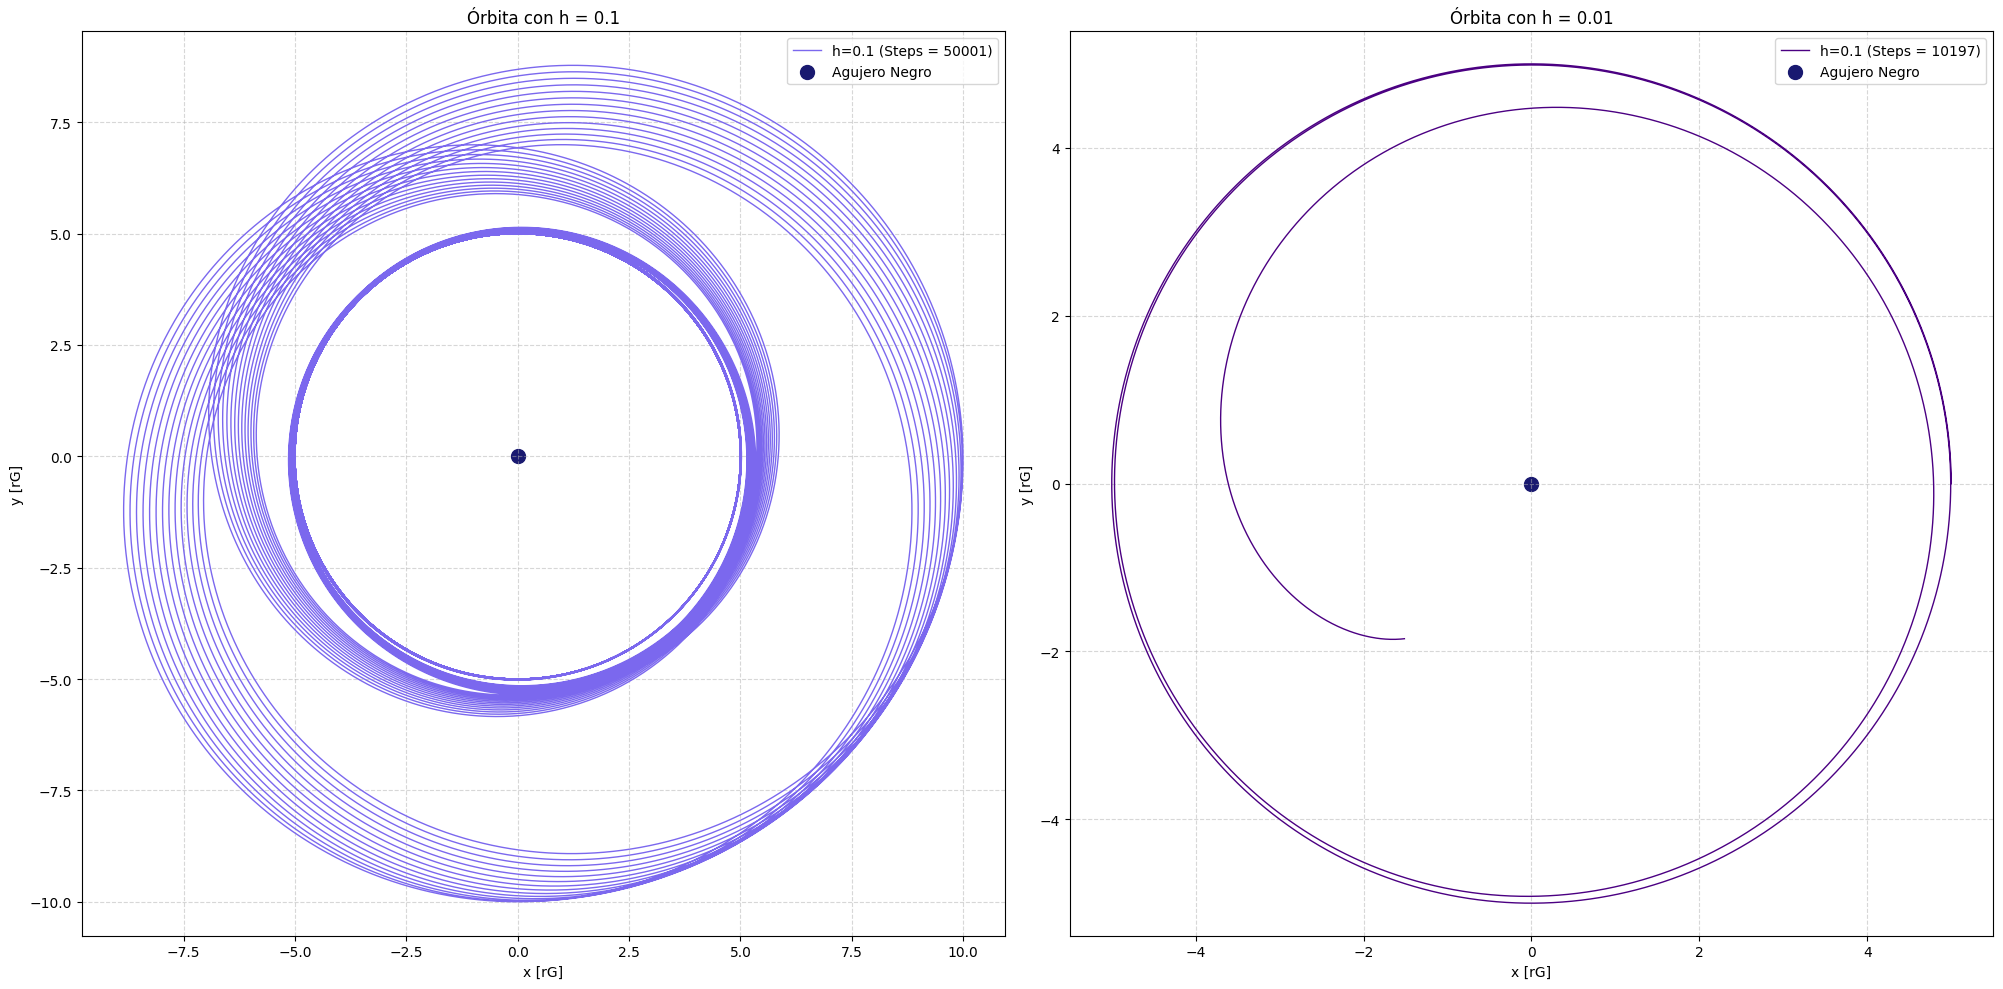

In [46]:
# Normalización de constantes

G = 1 # cte grav de Newton
c = 1 # velocidad de la luz
M = 1 # Masa del agujero negro, todas normalizadas

rG = 2*G*M/c**2
r0 = rG          # queda rG = 2 así, que tiene sentido considerando que el primer radio será 2.5 * 2 = 5 < 6 que es el r_ISCO
t0 = np.sqrt(2)*rG/c

ri_1 = 2.5 * rG # unidad rG


def acel(r_vec):
    mod_r = np.linalg.norm(r_vec)
    factor = -G * M / (mod_r - rG)**2
    return r_vec * factor / mod_r

def leap(r, v, h):
    a = acel(r)
    v_half = v + 0.5 * h * acel(r)
    r_new = r + h * v_half
    a_new = acel(r_new)
    v_new = v_half + 0.5 * h * a_new
    return r_new, v_new

def leapfrog(h, ri):
    # Parámetros de simulación
    T = 5000             # tiempo total en unidades t0
    N = int(T / h)       # número de pasos

    v_c = np.sqrt(G*M*ri/(ri - rG)**2) # velocidad mínima para orbitas circulares
    vi = v_c * (1 - 1e-5)

    # Inicialización
    r = np.array([ri, 0.0])
    v = np.array([0.0, vi])
    track = [r.copy()]  # guardamos las posiciones

    # Loop Leapfrog
    for _ in range(N):
        r, v = leap(r, v, h)
        track.append(r.copy())
        
        if np.linalg.norm(r) < 1.2 * rG:
            print("¡La partícula cayó dentro del agujero negro!")
            break

    track_arr = np.array(track)

    return track_arr, h

track_h1, h1 = leapfrog(h = 0.1, ri = ri_1)
track_h01, h01 = leapfrog(h = 0.01, ri = ri_1)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(track_h1[:,0], track_h1[:,1], color = 'mediumslateblue', 
         ls = '-', lw = 1, label = f'h=0.1 (Steps = {len(track_h1)})')
plt.scatter([0], [0], color = 'midnightblue', s = 100, label = 'Agujero Negro')
plt.xlabel("x [rG]")
plt.ylabel("y [rG]")
plt.title(f"Órbita con h = {h1}")
plt.axis("equal")
plt.legend()
plt.grid(alpha = 0.5, ls = '--')

plt.subplot(1, 2, 2)
plt.plot(track_h01[:,0], track_h01[:,1], color = 'indigo', 
         ls = '-', lw = 1, label = f'h=0.1 (Steps = {len(track_h01)})')
plt.scatter([0], [0], color = 'midnightblue', s = 100, label = 'Agujero Negro')
plt.xlabel("x [rG]")
plt.ylabel("y [rG]")
plt.title(f"Órbita con h = {h01}")
plt.axis("equal")
plt.legend()
plt.grid(alpha = 0.5, ls = '--')

plt.tight_layout()
plt.show()

* En el caso con radio inicial $2.5 r_G$ y $h = 0.1$, el método se dispara y puede hacer los 5000 pasos, pero no es representativo de la física del problema, mientras que con un paso más pequeño si se representa de buena manera lo que debería suceder. Esto nos dice que el paso $h = 0.1$ es muy grande para este caso y el método "se cae" con un $h$ de ese tamaño. Eso si, cómo se verá después, esto depende del problema complpeto, considerando el radio inicial!

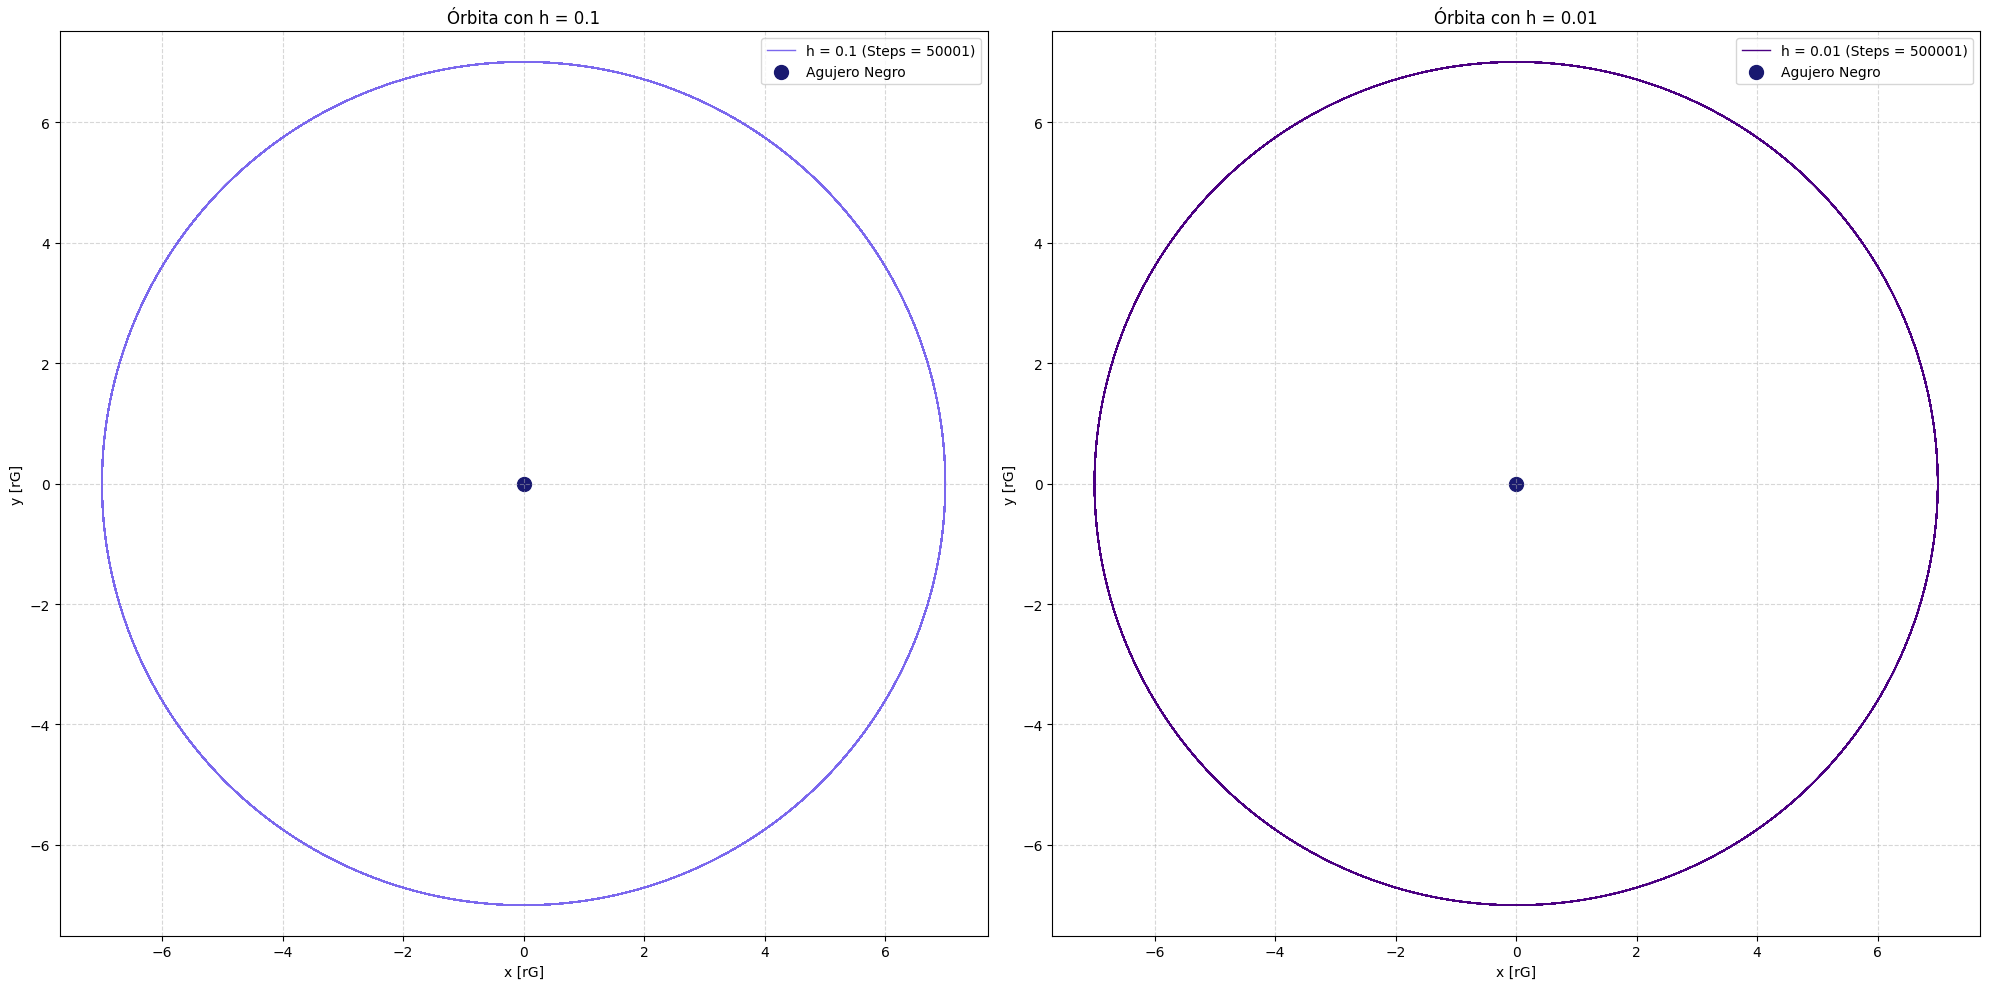

In [47]:
ri_2 = 3.5 * rG # para parte b)

track_35_h1, _ = leapfrog(h = 0.1, ri = ri_2)
track_35_h01, _ = leapfrog(h = 0.01, ri = ri_2)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(track_35_h1[:, 0], track_35_h1[:, 1], color = 'mediumslateblue', 
         ls = '-', lw = 1, label = f'h = {h1} (Steps = {len(track_35_h1)})')
plt.scatter([0], [0], color = 'midnightblue', s = 100, label = 'Agujero Negro')
plt.xlabel("x [rG]")
plt.ylabel("y [rG]")
plt.title(f"Órbita con h = {h1}")
plt.axis("equal")
plt.legend()
plt.grid(alpha = 0.5, ls = '--')

plt.subplot(1, 2, 2)
plt.plot(track_35_h01[:,0], track_35_h01[:,1], color = 'indigo', 
         ls = '-', lw = 1, label = f'h = {h01} (Steps = {len(track_35_h01)})')
plt.scatter([0], [0], color = 'midnightblue', s = 100, label = 'Agujero Negro')
plt.xlabel("x [rG]")
plt.ylabel("y [rG]")
plt.title(f"Órbita con h = {h01}")
plt.axis("equal")
plt.legend()
plt.grid(alpha = 0.5, ls = '--')

plt.tight_layout()
plt.show()

* Cómo se mencionó el final de la primera parte de la P2, el paso $h = 0.1$ era muy grande en caso de un radio inicial de 2.5 veces $r_G$, y causaba que el problema no se representara correctamente. Sin embargo, en el caso en que el radio inicial es mayor a $r_{ISCO}$, en este caso, $3 r_G = r_{ISCO}\leq 3.5 r_G$, el paso $h = 0.1$ si modela de buena manera el problema. 
* Con esto, podemos decir que el potencial de Paczynski-Wiita permite visualizar efectivamente los comportamientos relativistas de este problema, estabilizándose en órbitas circulares en caso de tener un radio mayor a $r_{ISCO}$, mientras qe si se toma un radio menor, dependerá del paso tomado la estabilidad del método, pero aún asi el potencial logra simular lo que pasaría en ese caso (la partícula caería inevitablemente al agujero negro).

# P3

## RK2 Adaptativo (clases)

Tiempo de ejecucion: 0.013443900039419532 segundos
Pasos totales: 1646


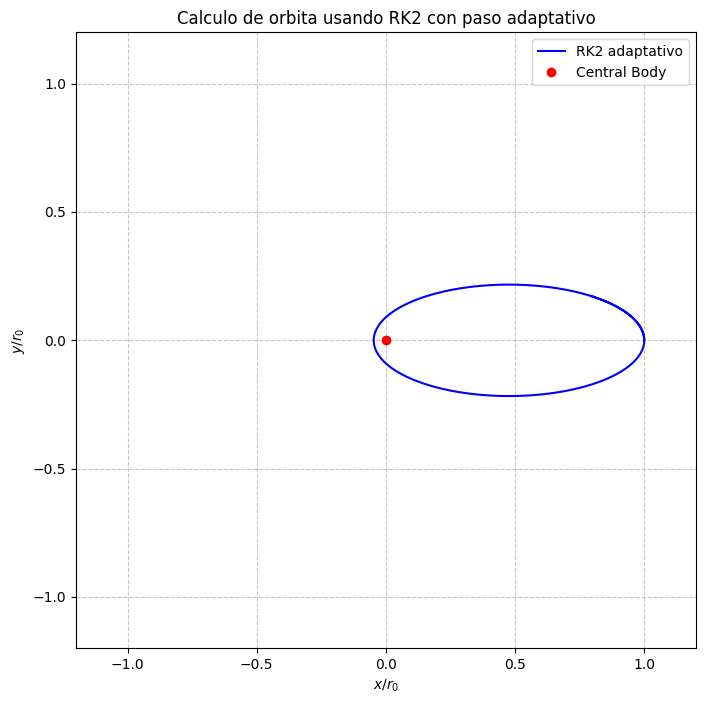

In [ ]:
# Constantes
L = 3.0
N = 1000  # esto sirve para determinar el h inicial, pero será inmediatamente corregido (da lo mismo)
h = L / N  
rtol = 1e-6
atol = 1e-9

# paso de RK2
def rk2_step(x, y, vx, vy, h):
    r2 = x**2 + y**2
    r3 = r2 ** 1.5
    ax = -x / r3
    ay = -y / r3

    k1vx = h * ax
    k1vy = h * ay
    k1x = h * vx
    k1y = h * vy

    x_half = x + 0.5 * k1x
    y_half = y + 0.5 * k1y
    vx_half = vx + 0.5 * k1vx
    vy_half = vy + 0.5 * k1vy

    r2_half = x_half**2 + y_half**2
    r3_half = r2_half ** 1.5
    ax_half = -x_half / r3_half
    ay_half = -y_half / r3_half

    k2vx = h * ax_half
    k2vy = h * ay_half
    k2x = h * vx_half
    k2y = h * vy_half

    return x + k2x, y + k2y, vx + k2vx, vy + k2vy

# calculamos las energias
def compute_quantities(x, y, vx, vy):
    r = np.sqrt(x**2 + y**2)
    kinetic = 0.5 * (vx**2 + vy**2)
    potential = -1.0 / r
    energy = kinetic + potential
    return kinetic, potential, energy

def implementacionRK2(h):
    # Inicializamos los arreglos
    max_steps = 100 * N + 1
    x_arr = np.empty(max_steps)
    y_arr = np.empty(max_steps)
    vx_arr = np.empty(max_steps)
    vy_arr = np.empty(max_steps)
    K_arr = np.empty(max_steps)
    U_arr = np.empty(max_steps)
    E_arr = np.empty(max_steps)
    t_arr = np.empty(max_steps)

    # calculamos condiciones iniciales
    x_arr[0], y_arr[0] = 1.0, 0.0
    vx_arr[0], vy_arr[0] = 0.0, 0.3
    K_arr[0], U_arr[0], E_arr[0] = compute_quantities(x_arr[0], y_arr[0], vx_arr[0], vy_arr[0])
    t_arr[0] = 0.0

    start = time.perf_counter()
    i = 0
    tempo = 0.0

    # aca hacemos el doblamiento de paso
    while tempo < L:
        # primer paso RK2 
        x1, y1, vx1, vy1 = rk2_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], h)
        K1, U1, E1 = compute_quantities(x1, y1, vx1, vy1)

        # segundo paso RK2
        x2, y2, vx2, vy2 = rk2_step(x1, y1, vx1, vy1, h)
        K2, U2, E2 = compute_quantities(x2, y2, vx2, vy2)

        # paso doble de RK2 (2h total)
        x_big, y_big, vx_big, vy_big = rk2_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], 2 * h)

        # estimacion del error
        deltax = (x2 - x_arr[i]) - (x_big - x_arr[i])
        deltay = (y2 - y_arr[i]) - (y_big - y_arr[i])
        deltavx = (vx2 - vx_arr[i]) - (vx_big - vx_arr[i])
        deltavy = (vy2 - vy_arr[i]) - (vy_big - vy_arr[i])

        scalex = atol + abs(max(x_arr[i],x1)) * rtol
        scaley = atol + abs(max(y_arr[i],y1)) * rtol
        scalevx = atol + abs(max(vx_arr[i],vx1)) * rtol
        scalevy = atol + abs(max(vy_arr[i],vy1)) * rtol

        err = np.sqrt(0.25 * ((deltax / scalex)**2 + (deltay / scaley)**2 +
                            (deltavx / scalevx)**2 + (deltavy / scalevy)**2))

        # guardamos el primer paso
        x_arr[i+1], y_arr[i+1] = x1, y1
        vx_arr[i+1], vy_arr[i+1] = vx1, vy1
        K_arr[i+1], U_arr[i+1], E_arr[i+1] = K1, U1, E1
        t_arr[i+1] = t_arr[i] + h

        # guardamos el segundo paso
        x_arr[i+2], y_arr[i+2] = x2, y2
        vx_arr[i+2], vy_arr[i+2] = vx2, vy2
        K_arr[i+2], U_arr[i+2], E_arr[i+2] = K2, U2, E2
        t_arr[i+2] = t_arr[i+1] + h

        # ajuste adaptativo del paso (que valdrá para la siguiente iteración)
        h = h / err**(1/3)

        i += 2
        tempo = t_arr[i]

    end = time.perf_counter()

    # cortamos la parte de los arreglos que tienen ceros
    x_arr = x_arr[:i+1]
    y_arr = y_arr[:i+1]
    vx_arr = vx_arr[:i+1]
    vy_arr = vy_arr[:i+1]
    K_arr = K_arr[:i+1]
    U_arr = U_arr[:i+1]
    E_arr = E_arr[:i+1]
    t_arr = t_arr[:i+1]

    dif = end - start
    return x_arr, y_arr, vx_arr, vy_arr, K_arr, U_arr, E_arr, t_arr, dif, i

x2, y2, vx2, vy2, K2, U2, E2, t2, d2, pasos2 = implementacionRK2(h)

print('Tiempo de ejecucion:', d2, 'segundos')
print('Pasos totales:', pasos2)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x2, y2, label='RK2 adaptativo', color='blue')
plt.plot(0, 0, 'ro', label='Central Body')
plt.xlabel("$x/r_0$")
plt.ylabel("$y/r_0$")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()
plt.grid(alpha = 0.7, ls = '--')
plt.title("Calculo de orbita usando RK2 con paso adaptativo")
plt.show()

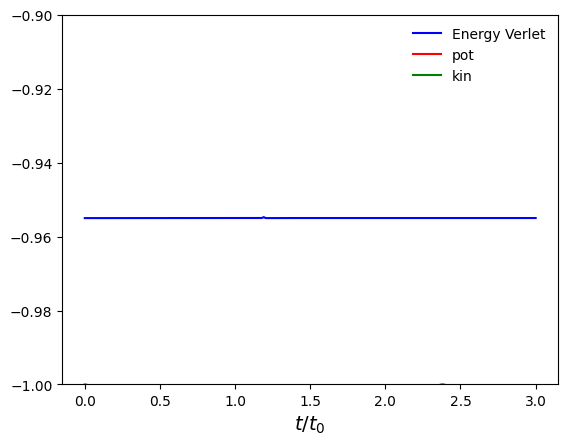

In [39]:
plt.plot(t2,E2,color='blue', label='Energy Verlet')
plt.plot(t2,U2,color='red', label='pot')
plt.plot(t2,K2,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-1.,-.9)
plt.show()

## Implementación RK4 Adaptativo

Tiempo de ejecucion: 0.0025470999535173178 segundos
Pasos totales: 194


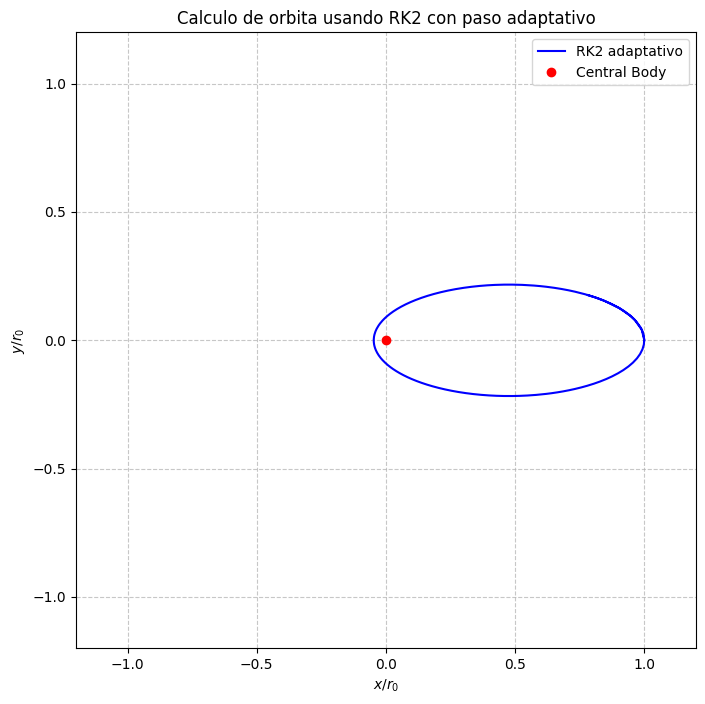

In [40]:
# Constantes
L = 3.0
N = 1000  # esto sirve para determinar el h inicial, pero será inmediatamente corregido (da lo mismo)
h = L / N  
rtol = 1e-6
atol = 1e-9

# paso de RK4
def rk4_step(x, y, vx, vy, h):
    # Primer paso
    r2 = x**2 + y**2
    r3 = r2 ** 1.5
    ax = -x / r3
    ay = -y / r3

    k1vx = h * ax
    k1vy = h * ay
    k1x = h * vx
    k1y = h * vy

    # Segundo paso
    x2 = x + 0.5 * k1x
    y2 = y + 0.5 * k1y
    vx2 = vx + 0.5 * k1vx
    vy2 = vy + 0.5 * k1vy
    r2 = x2**2 + y2**2
    r3 = r2 ** 1.5
    ax = -x2 / r3
    ay = -y2 / r3

    k2vx = h * ax
    k2vy = h * ay
    k2x = h * vx2
    k2y = h * vy2

    # Tercer paso
    x3 = x + 0.5 * k2x
    y3 = y + 0.5 * k2y
    vx3 = vx + 0.5 * k2vx
    vy3 = vy + 0.5 * k2vy
    r2 = x3**2 + y3**2
    r3 = r2 ** 1.5
    ax = -x3 / r3
    ay = -y3 / r3

    k3vx = h * ax
    k3vy = h * ay
    k3x = h * vx3
    k3y = h * vy3

    # Cuarto paso
    x4 = x + k3x
    y4 = y + k3y
    vx4 = vx + k3vx
    vy4 = vy + k3vy
    r2 = x4**2 + y4**2
    r3 = r2 ** 1.5
    ax = -x4 / r3
    ay = -y4 / r3

    k4vx = h * ax
    k4vy = h * ay
    k4x = h * vx4
    k4y = h * vy4

    # Pasos sig.
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x) / 6
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y) / 6
    vx_new = vx + (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6
    vy_new = vy + (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6

    return x_new, y_new, vx_new, vy_new

# calculamos las energias
def compute_quantities(x, y, vx, vy):
    r = np.sqrt(x**2 + y**2)
    kinetic = 0.5 * (vx**2 + vy**2)
    potential = -1.0 / r
    energy = kinetic + potential
    return kinetic, potential, energy

def implementacionRK4(h):
    # Inicializamos los arreglos
    max_steps = 100 * N + 1
    x_arr = np.empty(max_steps)
    y_arr = np.empty(max_steps)
    vx_arr = np.empty(max_steps)
    vy_arr = np.empty(max_steps)
    K_arr = np.empty(max_steps)
    U_arr = np.empty(max_steps)
    E_arr = np.empty(max_steps)
    t_arr = np.empty(max_steps)

    # calculamos condiciones iniciales
    x_arr[0], y_arr[0] = 1.0, 0.0
    vx_arr[0], vy_arr[0] = 0.0, 0.3
    K_arr[0], U_arr[0], E_arr[0] = compute_quantities(x_arr[0], y_arr[0], vx_arr[0], vy_arr[0])
    t_arr[0] = 0.0

    start = time.perf_counter()
    i = 0
    tempo = 0.0

    # aca hacemos el doblamiento de paso
    while tempo < L:
        # primer paso RK4 
        x1, y1, vx1, vy1 = rk4_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], h)
        K1, U1, E1 = compute_quantities(x1, y1, vx1, vy1)

        # segundo paso RK4
        x2, y2, vx2, vy2 = rk4_step(x1, y1, vx1, vy1, h)
        K2, U2, E2 = compute_quantities(x2, y2, vx2, vy2)

        # paso doble de RK4 (2h total)
        x_big, y_big, vx_big, vy_big = rk4_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], 2 * h)

        # estimacion del error
        deltax = (x2 - x_arr[i]) - (x_big - x_arr[i])
        deltay = (y2 - y_arr[i]) - (y_big - y_arr[i])
        deltavx = (vx2 - vx_arr[i]) - (vx_big - vx_arr[i])
        deltavy = (vy2 - vy_arr[i]) - (vy_big - vy_arr[i])

        scalex = atol + abs(max(x_arr[i],x1)) * rtol
        scaley = atol + abs(max(y_arr[i],y1)) * rtol
        scalevx = atol + abs(max(vx_arr[i],vx1)) * rtol
        scalevy = atol + abs(max(vy_arr[i],vy1)) * rtol

        err = np.sqrt(0.25 * ((deltax / scalex)**2 + (deltay / scaley)**2 +
                            (deltavx / scalevx)**2 + (deltavy / scalevy)**2))

        # guardamos el primer paso
        x_arr[i+1], y_arr[i+1] = x1, y1
        vx_arr[i+1], vy_arr[i+1] = vx1, vy1
        K_arr[i+1], U_arr[i+1], E_arr[i+1] = K1, U1, E1
        t_arr[i+1] = t_arr[i] + h

        # guardamos el segundo paso
        x_arr[i+2], y_arr[i+2] = x2, y2
        vx_arr[i+2], vy_arr[i+2] = vx2, vy2
        K_arr[i+2], U_arr[i+2], E_arr[i+2] = K2, U2, E2
        t_arr[i+2] = t_arr[i+1] + h

        # ajuste adaptativo del paso (que valdrá para la siguiente iteración)
        h = h / err**(1/3)

        i += 2
        tempo = t_arr[i]

    end = time.perf_counter()

    # cortamos la parte de los arreglos que tienen ceros
    x_arr = x_arr[:i+1]
    y_arr = y_arr[:i+1]
    vx_arr = vx_arr[:i+1]
    vy_arr = vy_arr[:i+1]
    K_arr = K_arr[:i+1]
    U_arr = U_arr[:i+1]
    E_arr = E_arr[:i+1]
    t_arr = t_arr[:i+1]

    dif = end - start
    return x_arr, y_arr, vx_arr, vy_arr, K_arr, U_arr, E_arr, t_arr, dif, i

x4, y4, vx4, vy4, K4, U4, E4, t4, d4, pasos4 = implementacionRK4(h)

print('Tiempo de ejecucion:', d4, 'segundos')
print('Pasos totales:', pasos4)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x4, y4, label='RK2 adaptativo', color='blue')
plt.plot(0, 0, 'ro', label='Central Body')
plt.xlabel("$x/r_0$")
plt.ylabel("$y/r_0$")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()
plt.grid(alpha = 0.7, ls = '--')
plt.title("Calculo de orbita usando RK2 con paso adaptativo")
plt.show()

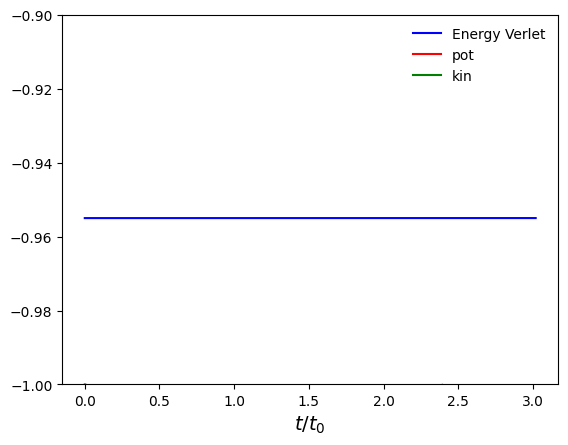

In [41]:
plt.plot(t4,E4,color='blue', label='Energy Verlet')
plt.plot(t4,U4,color='red', label='pot')
plt.plot(t4,K4,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-1.,-.9)
plt.show()

* Comparando los tiempos de ejecución y los pasos tomados, se puede ver que ambos mejoran para el caso de RK4, sin sacrificar la conservación de energía para nada. En particular, el tiempo tomado en ejecutar baja un orden de magnitud (de 0.02 a 0.002), y los pasos se reducen también en un orden de magnitud más o menos (de 1646 a 194 pasos).